### Import Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Read CSV

In [34]:
boston = pd.read_csv('boston.csv')

#### Visual EDA

In [35]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [36]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Data and Target Collection

In [37]:
X = boston.drop('MEDV', axis=1).values
y = boston.MEDV.values

In [50]:
x_rooms = X[:, 5]
x_rooms = x_rooms.reshape(-1,1)
y = y.reshape(-1,1)


#### Regression Model for Prediction

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_rooms, y, test_size=0.3)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Prediction Space

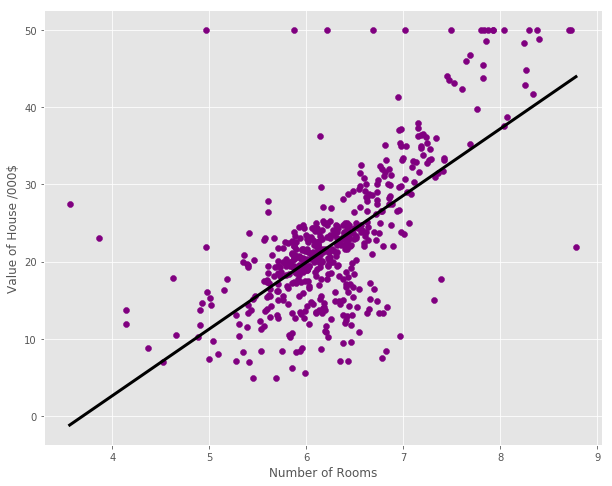

In [59]:
rooms = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1)
plt.figure(figsize=(10, 8))
plt.scatter(x_rooms, y, color='purple')
plt.plot(rooms, reg.predict(rooms), color='black', linewidth=3)
plt.xlabel('Number of Rooms')
plt.ylabel('Value of House /000$')
plt.show()

#### $R^2$ and RMSE

In [61]:
y_pred = reg.predict(x_test)
print("R^2: {}".format(reg.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6127841067483737
Root Mean Squared Error: 5.8371172925192
